# 2. Análise Exploratória dos Dados:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.tsa.stattools

from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('data/vendas.csv')

In [3]:
df.head()

,refer,descricao,categoria,colecao,grupo,tecido,linha,cdfisc,fabricacaopropria,datacriacao,...,qtd,vlunitario,vldesconto,loja,seqvenda,forma_pagto,tabela,cliente,dtvenda,hora
0,306275,TOP TOQUIO FM (MALHA),NaN,2491.0,5.0,99.0,2.0,61069000,True,NaN,...,1.0,49.9,0.0,1.0,1846.0,1.0,2.0,29366.0,2022-01-04,01:55
1,26905,SHORT TIRA FM (JEANS),0.0,2488.0,2.0,99.0,2.0,62046200,True,NaN,...,1.0,104.9,0.0,1.0,6.0,1.0,2.0,32740.0,2021-09-20,17:58
2,26905,SHORT TIRA FM (JEANS),0.0,2488.0,2.0,99.0,2.0,62046200,True,NaN,...,1.0,104.9,0.0,1.0,6.0,1.0,2.0,32740.0,2021-09-20,17:58
3,26905,SHORT TIRA FM (JEANS),0.0,2488.0,2.0,99.0,2.0,62046200,True,NaN,...,1.0,104.9,0.0,1.0,6.0,1.0,2.0,32740.0,2021-09-20,17:58
4,26905,SHORT TIRA FM (JEANS),0.0,2488.0,2.0,99.0,2.0,62046200,True,NaN,...,1.0,104.9,0.0,1.0,6.0,1.0,2.0,32740.0,2021-09-20,17:58


## 2.1 - Distribuição dos dados

In [4]:
dfr = df.loc[df.index.repeat(df['qtd'])].reset_index(drop=True)

In [5]:
ranking = dfr.groupby('refer')[['seqvenda']].count().sort_values(by='seqvenda', ascending=False).reset_index()
ranking['rank'] = ranking.index +1

ranking.head()

,refer,seqvenda,rank
0,307698,1483,1
1,307606,1400,2
2,90192,1298,3
3,16156,1058,4
4,307696,935,5


In [6]:
dfr = pd.merge(dfr, ranking[['refer','rank']], right_on='refer', left_on='refer')
dfr.head()

,refer,descricao,categoria,colecao,grupo,tecido,linha,cdfisc,fabricacaopropria,datacriacao,...,vlunitario,vldesconto,loja,seqvenda,forma_pagto,tabela,cliente,dtvenda,hora,rank
0,306275,TOP TOQUIO FM (MALHA),NaN,2491.0,5.0,99.0,2.0,61069000,True,NaN,...,49.9,0.0,1.0,1846.0,1.0,2.0,29366.0,2022-01-04,01:55,938
1,26905,SHORT TIRA FM (JEANS),0.0,2488.0,2.0,99.0,2.0,62046200,True,NaN,...,104.9,0.0,1.0,6.0,1.0,2.0,32740.0,2021-09-20,17:58,1250
2,26905,SHORT TIRA FM (JEANS),0.0,2488.0,2.0,99.0,2.0,62046200,True,NaN,...,104.9,0.0,1.0,6.0,1.0,2.0,32740.0,2021-09-20,17:58,1250
3,26905,SHORT TIRA FM (JEANS),0.0,2488.0,2.0,99.0,2.0,62046200,True,NaN,...,104.9,0.0,1.0,6.0,1.0,2.0,32740.0,2021-09-20,17:58,1250
4,26905,SHORT TIRA FM (JEANS),0.0,2488.0,2.0,99.0,2.0,62046200,True,NaN,...,104.9,0.0,1.0,6.0,1.0,2.0,32740.0,2021-09-20,17:58,1250


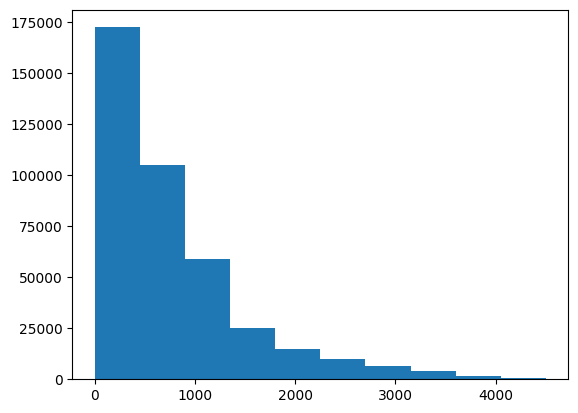

In [7]:
plt.hist(dfr['rank']);

### Analise inicial para identificar a distribuição de vendas

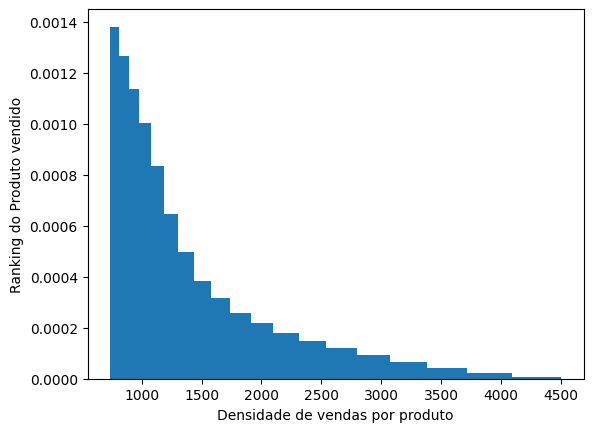

In [8]:
#Pareto

nbins = 20
serie = np.array(dfr['rank'])
#log binning
bin_edges = np.linspace(1,nbins,nbins)
bin_edges = np.power(1.1,bin_edges)
bin_edges = serie.max()*bin_edges/bin_edges.max()

plt.hist(serie,bins = bin_edges ,density=True)

plt.xlabel('Densidade de vendas por produto')
plt.ylabel('Ranking do Produto vendido')

# plt.yscale('log')
# plt.xscale('log')

plt.show()

### Analise para identificar se é Pareto ou LogNormal

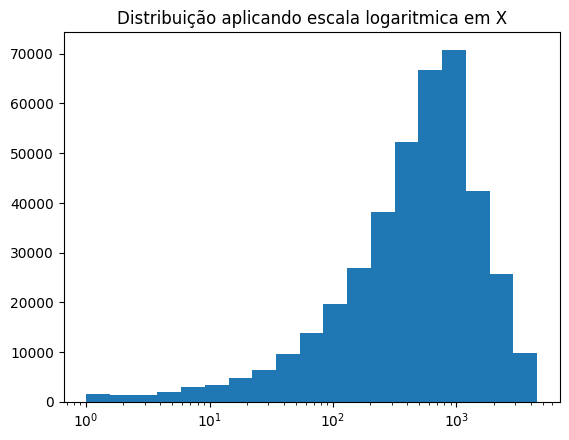

In [9]:
serie = np.array(dfr['rank'])
# Substitui bins linear por logaritmo
nbins = np.logspace(0, np.log(serie.max())/np.log(10), base = 10, num = 20)

#aplica escala logaritma no eixo x 
plt.xscale('log')
# plt.yscale('log')


plt.hist(serie, bins = nbins)
plt.title("Distribuição aplicando escala logaritmica em X")
plt.show()

## 2.2 - Balanceamento das Classes (em caso de classificação)

Por se tratar de um problema de regressão, não será necessário realizar o balanceamento das classes

## 2.3 - Outliers

In [32]:
dfqt = df.groupby('grupo')['qtd'].sum()\
    .reset_index()

Text(0.5, 1.0, 'Grupo 5 se destaca em volume de vendas')

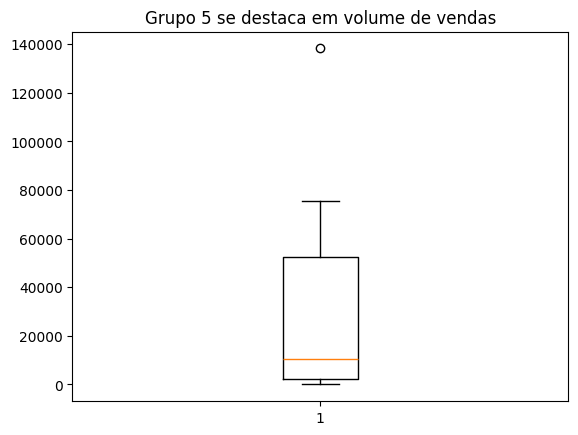

In [33]:
plt.boxplot(dfqt.qtd);
plt.title("Grupo 5 se destaca em volume de vendas")

In [14]:
dfqt[dfqt['qtd'] > 80000]

,grupo,qtd
4,5.0,138246.0


In [36]:
dfqt = df.groupby('loja')['qtd'].sum()\
    .reset_index()

Text(0.5, 1.0, 'Venda nas lojas sem outliers')

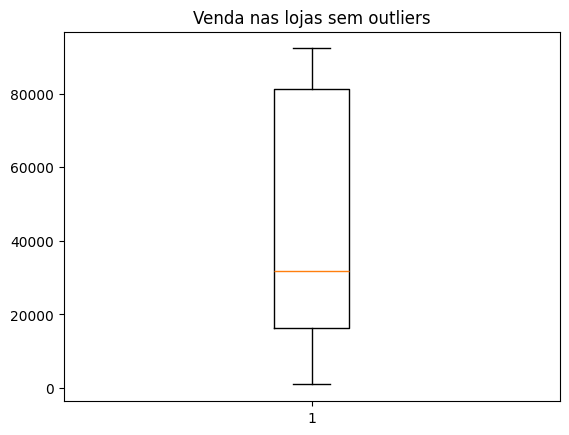

In [30]:
plt.boxplot(dfqt.qtd);
plt.title("Venda nas lojas sem outliers")

In [39]:
dfqt.sort_values(by='qtd', ascending=False).head()

,loja,qtd
2,3.0,92234.0
1,2.0,86583.0
3,4.0,81139.0
0,1.0,70019.0
4,5.0,31731.0


## 2.4 - Matriz de Correlações

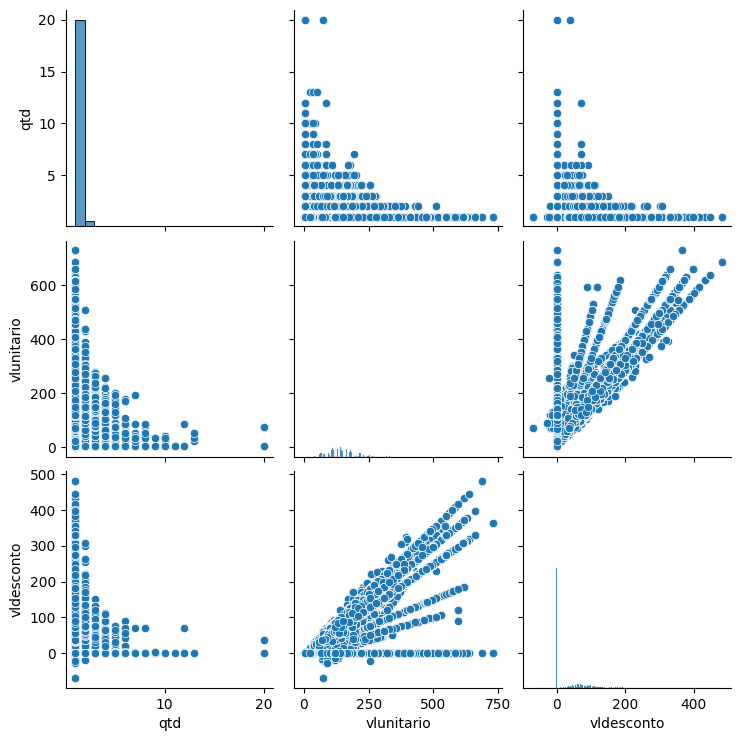

In [15]:
variaveis_nao_categoricas = ['qtd', 'vlunitario', 'vldesconto']
sns.pairplot(df[variaveis_nao_categoricas])

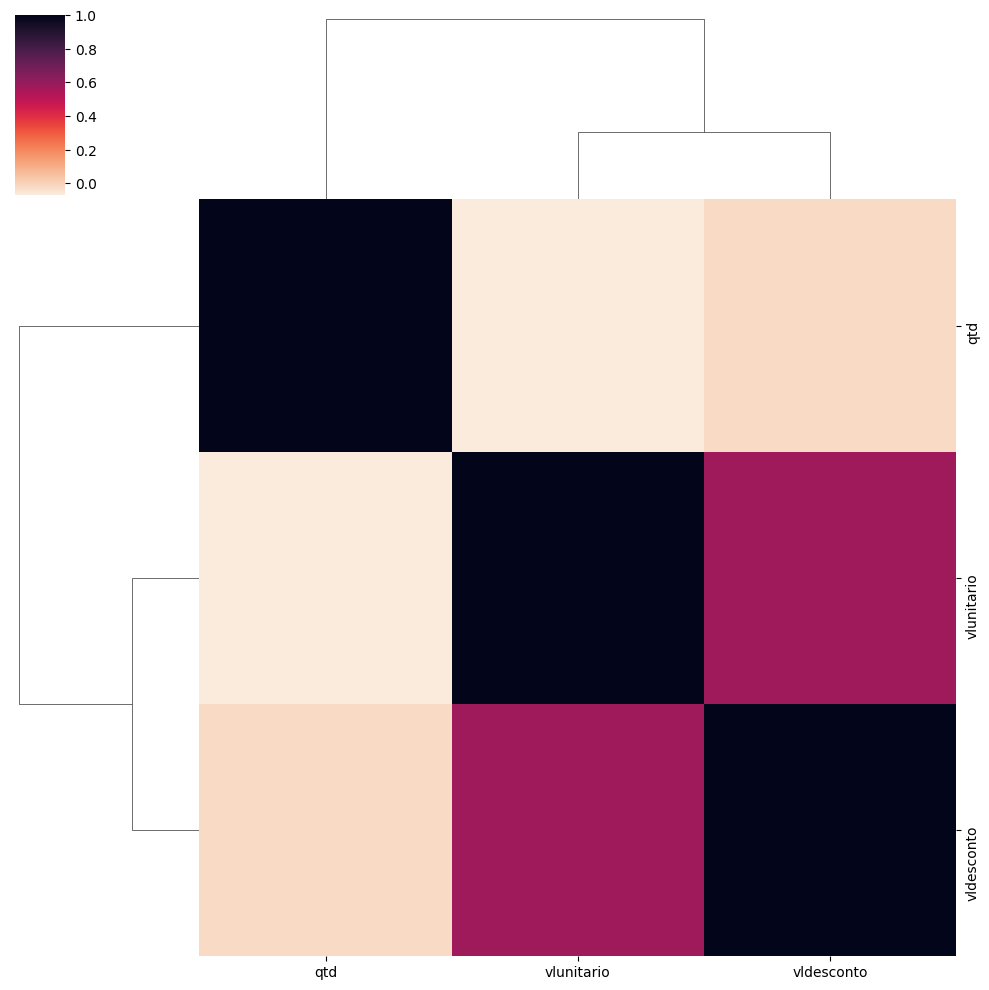

In [16]:
corr = df[variaveis_nao_categoricas].corr()

sns.clustermap(corr, cmap="rocket_r");

In [17]:
corr

,qtd,vlunitario,vldesconto
qtd,1.000000,-0.069960,-0.023383
vlunitario,-0.069960,1.000000,0.576506
vldesconto,-0.023383,0.576506,1.000000


### Sem correlação relevante entre variávies quantitativas

## 2.5 Estatísticas Descritivas

In [18]:
df[variaveis_nao_categoricas].describe()

,qtd,vlunitario,vldesconto
count,386416.000000,386416.000000,386416.000000
mean,1.033485,156.607076,37.806740
std,0.239310,76.879017,54.441483
min,1.000000,0.000000,-70.000000
25%,1.000000,109.900000,0.000000
50%,1.000000,139.900000,0.000000
75%,1.000000,184.900000,67.450000
max,20.000000,729.900000,481.530000


## 2.6 - Visualizações Temporais

In [47]:
df['vlvendido'] = df['qtd']* df['vlunitario']

df['date'] = pd.to_datetime(df['dtvenda'], format='%Y-%m-%d', errors='coerce')

df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_month'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['week_of_year'] = df['date'].dt.isocalendar().week
df.head()

,refer,descricao,categoria,colecao,grupo,tecido,linha,cdfisc,fabricacaopropria,datacriacao,...,dtvenda,hora,vlvendido,date,day_of_year,month,day_of_week,day_of_month,week_of_year,year
0,306275,TOP TOQUIO FM (MALHA),NaN,2491.0,5.0,99.0,2.0,61069000,True,NaN,...,2022-01-04,01:55,49.9,2022-01-04,4,1,1,4,1,2022
1,26905,SHORT TIRA FM (JEANS),0.0,2488.0,2.0,99.0,2.0,62046200,True,NaN,...,2021-09-20,17:58,104.9,2021-09-20,263,9,0,20,38,2021
2,26905,SHORT TIRA FM (JEANS),0.0,2488.0,2.0,99.0,2.0,62046200,True,NaN,...,2021-09-20,17:58,104.9,2021-09-20,263,9,0,20,38,2021
3,26905,SHORT TIRA FM (JEANS),0.0,2488.0,2.0,99.0,2.0,62046200,True,NaN,...,2021-09-20,17:58,104.9,2021-09-20,263,9,0,20,38,2021
4,26905,SHORT TIRA FM (JEANS),0.0,2488.0,2.0,99.0,2.0,62046200,True,NaN,...,2021-09-20,17:58,104.9,2021-09-20,263,9,0,20,38,2021


In [22]:

df_sales = df.groupby(['dtvenda']).agg({'qtd':'sum','vlvendido':'sum'})\
            .reset_index()


df_sales['date'] = pd.to_datetime(df_sales['dtvenda'], format='%Y-%m-%d', errors='coerce')

df_sales['day_of_year'] = df_sales['date'].dt.dayofyear
df_sales['month'] = df_sales['date'].dt.month
df_sales['day_of_week'] = df_sales['date'].dt.dayofweek
df_sales['day_of_month'] = df_sales['date'].dt.day
df_sales['week_of_year'] = df_sales['date'].dt.isocalendar().week

df_sales

,dtvenda,qtd,vlvendido,date,day_of_year,month,day_of_week,day_of_month,week_of_year
0,2021-09-02,6.0,566.40,2021-09-02,245,9,3,2,35
1,2021-09-03,32.0,3021.80,2021-09-03,246,9,4,3,35
2,2021-09-04,1.0,208.90,2021-09-04,247,9,5,4,35
3,2021-09-06,6.0,472.40,2021-09-06,249,9,0,6,36
4,2021-09-08,24.0,2192.60,2021-09-08,251,9,2,8,36
...,...,...,...,...,...,...,...,...,...
968,2024-06-06,341.0,46481.15,2024-06-06,158,6,3,6,23
969,2024-06-07,295.0,36805.00,2024-06-07,159,6,4,7,23
970,2024-06-08,164.0,31303.60,2024-06-08,160,6,5,8,23
971,2024-06-09,18.0,4172.20,2024-06-09,161,6,6,9,23


### A função a seguir preenche meses faltantes de um ano com 0 (zero)

Não será usado para o treino, mas para vizualização.
Isso porque o primeiro e o ultimo ano do dataset está incompleto

In [25]:

def plot_serie(df_plot, titulo):
    df_plot['date'] = pd.to_datetime(df_plot['dtvenda'], format='%Y-%m-%d', errors='coerce')

    for year in df_plot['date'].dt.year.unique():
        dt = datetime.strptime(str(year), '%Y')
        while dt.year == year:
            dt = dt + timedelta(days=1)
            if df_plot[df_plot['date']== dt].empty and dt.year == year:
                dft = pd.DataFrame({'date': [dt], 'dtvenda': [datetime.strftime(dt,'%Y-%m-%d')], 'qtd': [0], 'vlvendido': [0]})
                
                df_plot = pd.concat([df_plot, dft])


    df_plot.sort_values(by='date', inplace=True)

    years = df_plot['date'].dt.year.unique()

    plt.figure(figsize=(14, 2*len(years)))
    for sbplt, y in enumerate(years):
        
        dates = df_plot[df_plot['date'].dt.year == y]['date']
        sales = df_plot[df_plot['date'].dt.year == y]['qtd']
        prices = df_plot[df_plot['date'].dt.year == y]['vlvendido']

        plt.title(titulo)        
        plt.subplot(len(years), 1, sbplt+1)
        plt.plot(dates, sales, 'k-')
        plt.gca().twinx().plot(dates, prices, '--b', linewidth=0.5)
        
        if sbplt > 2:
            break

    plt.show()

### Análise temporal por lojas

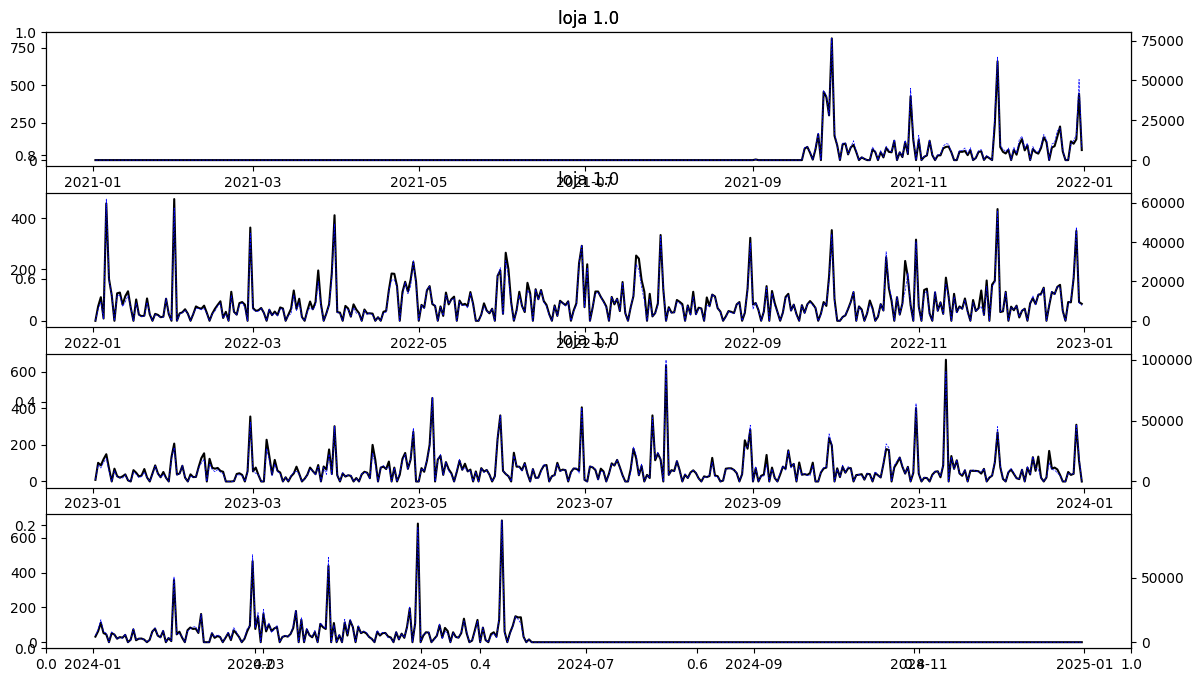

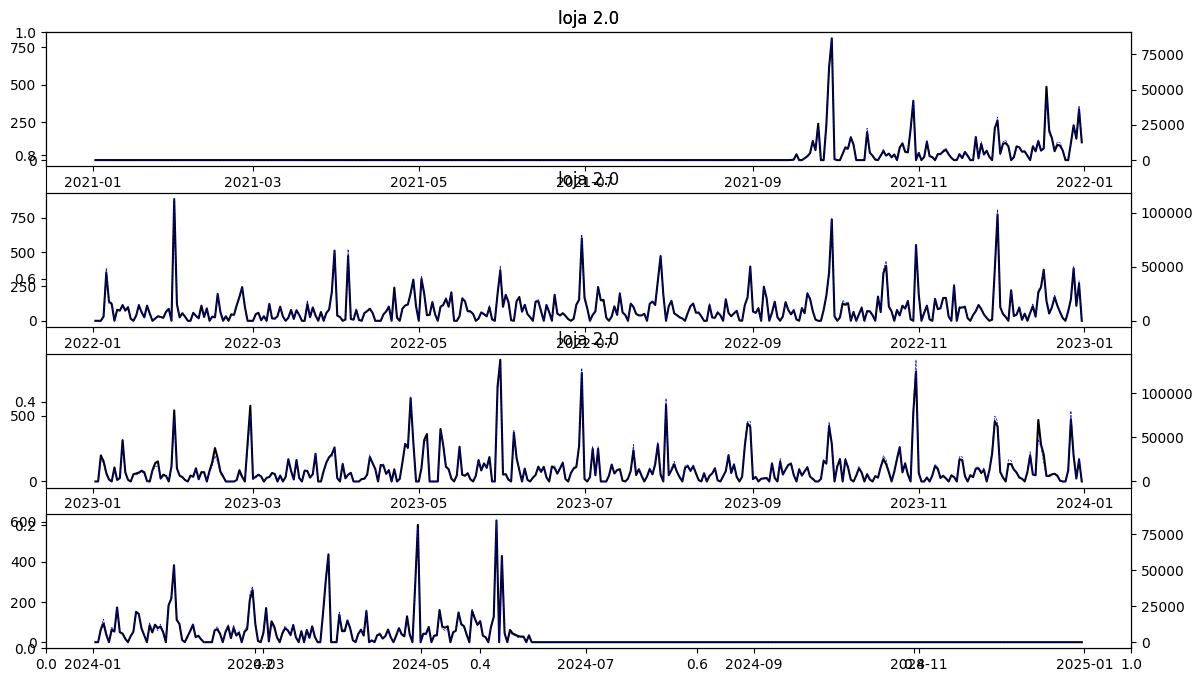

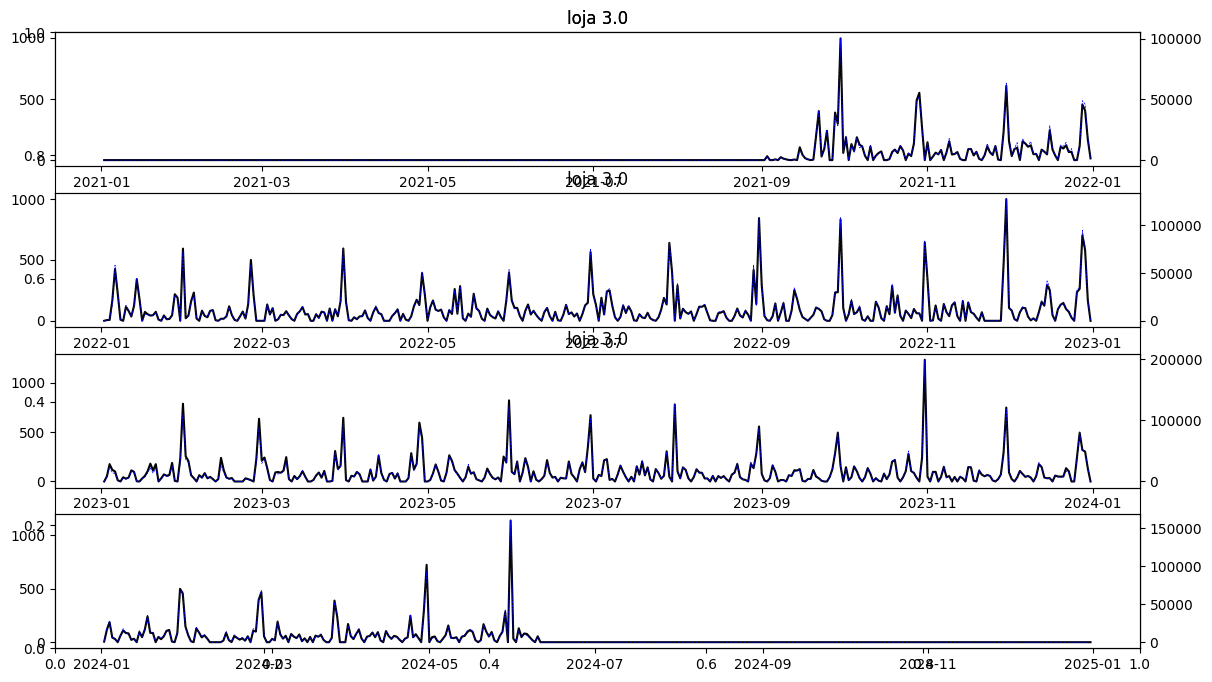

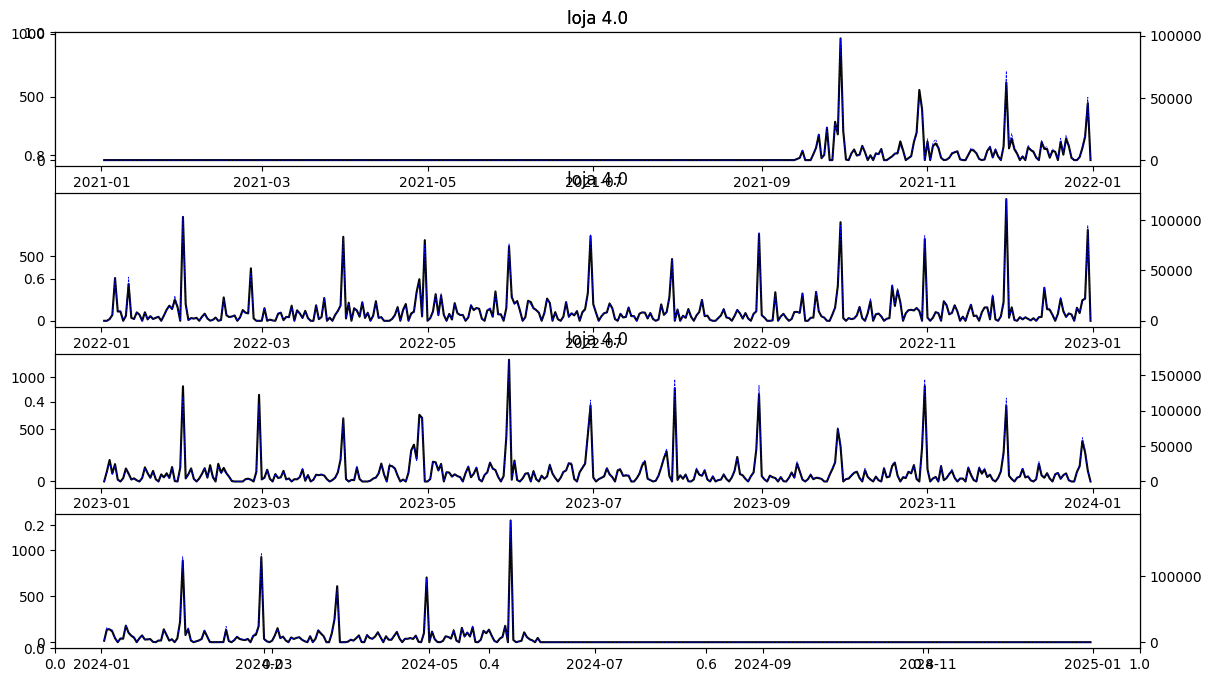

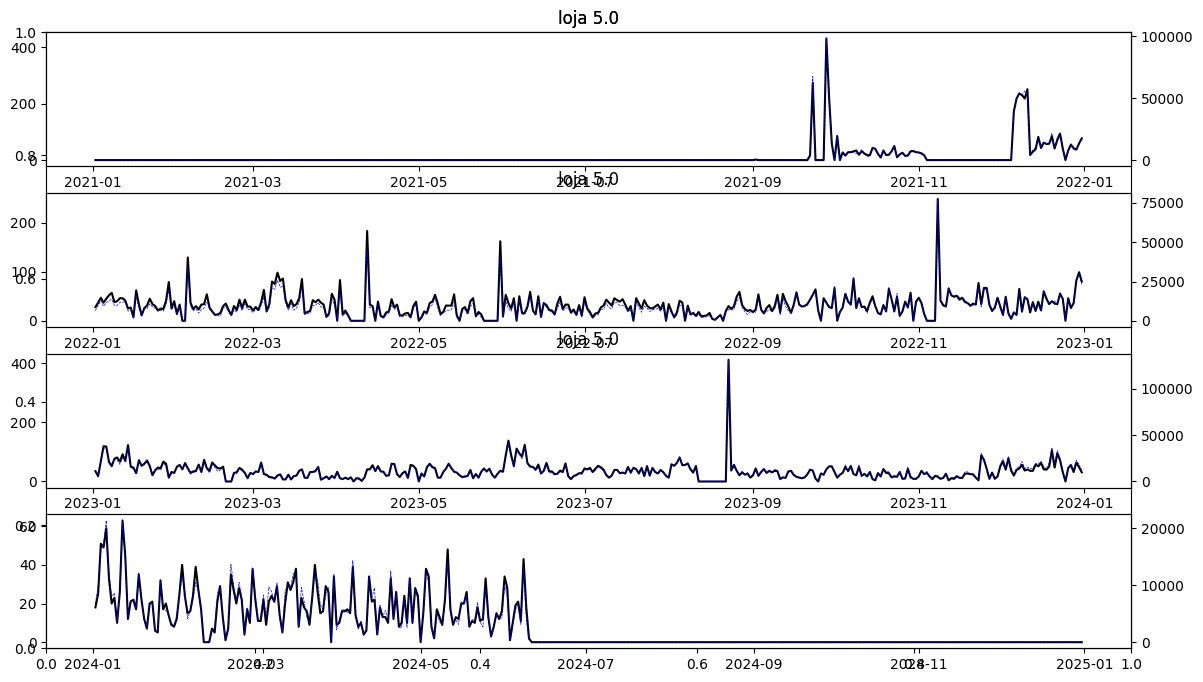

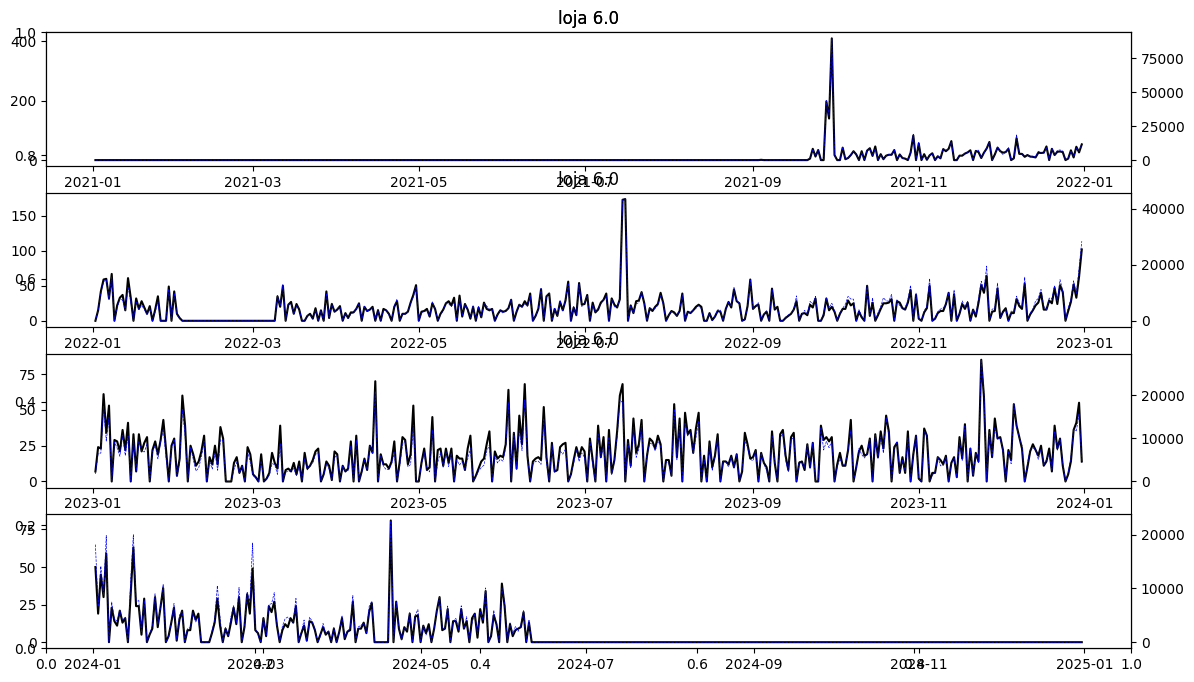

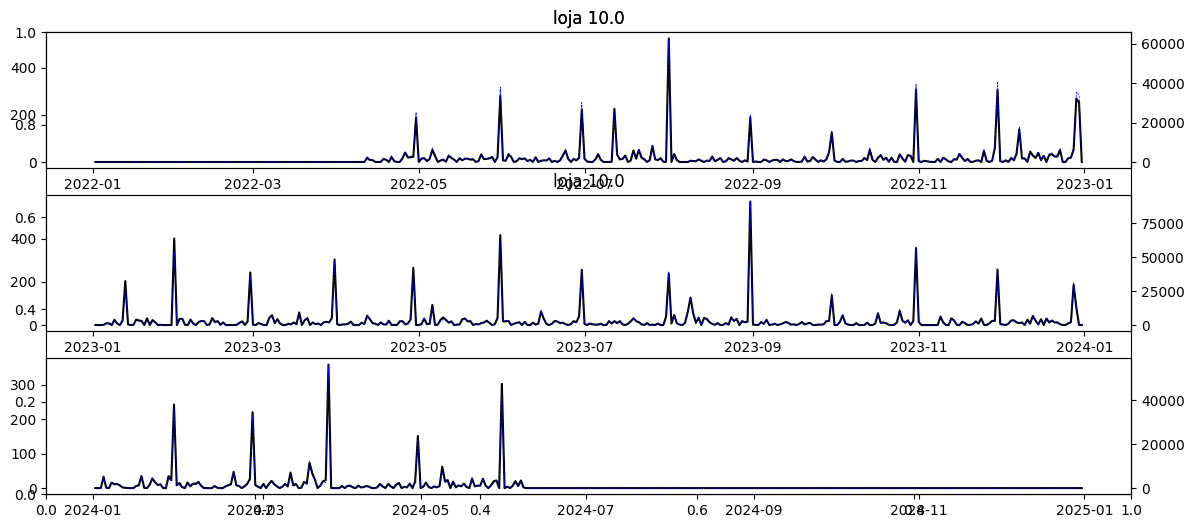

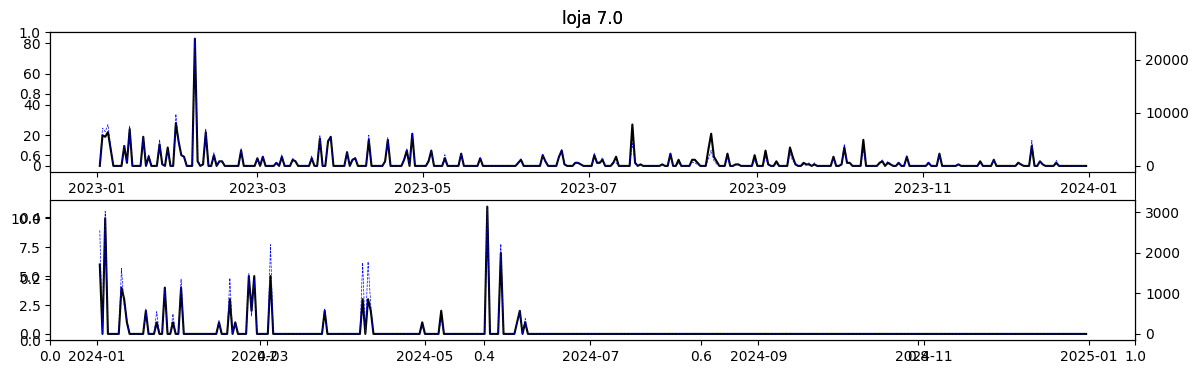

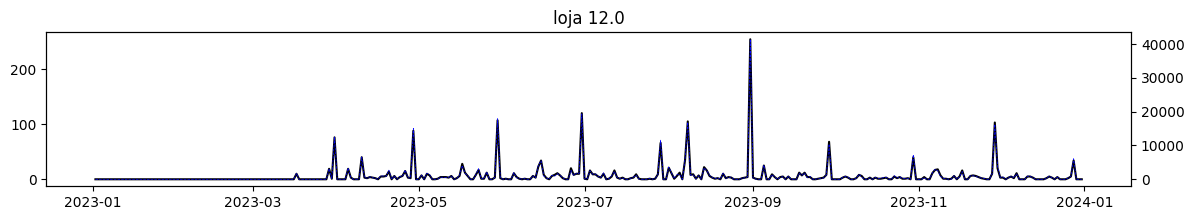

In [26]:
for loja in df.loja.unique():
    dft = df[df['loja'] == loja].groupby(['dtvenda']).agg({'qtd':'sum','vlvendido':'sum'})\
                        .reset_index()
    plot_serie(dft, f'loja {loja}')

### A loja 12 tem o historico reduzido

Isso ocorre algumas vezes por se tratar do que é chamado de Show Room, quando se cria um ambiente de vendas para um evento específico

### Apesar da loja 7 não apresentar venda em todos periodos, ela será mantida

Se trata de uma loja que iniciou as atividades posterior ao inicio das demais. Comum em abertura de novas praças de vendas e expansão de mercado

### Análise por grupo de produto

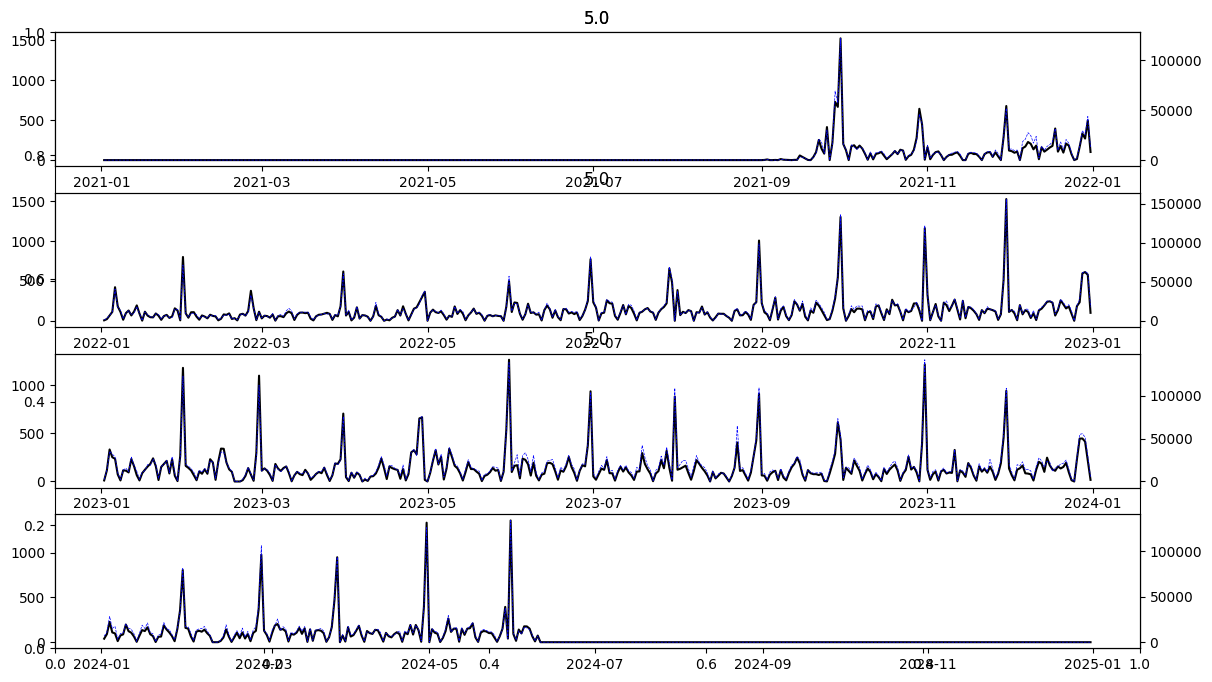

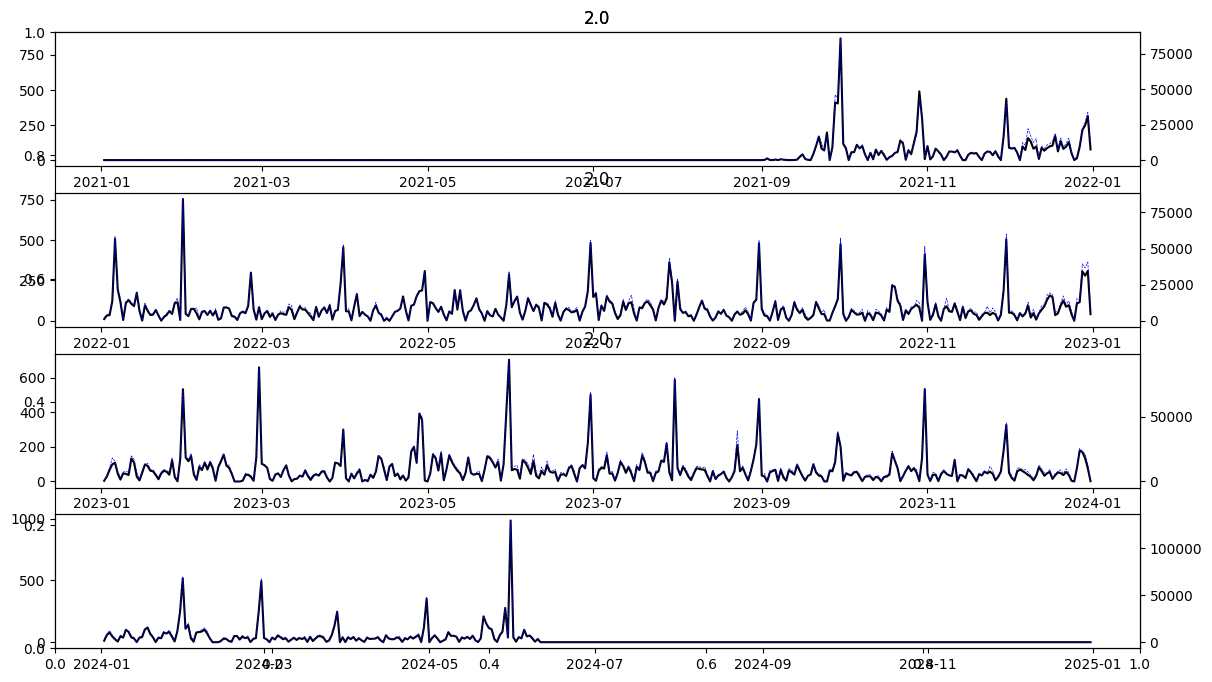

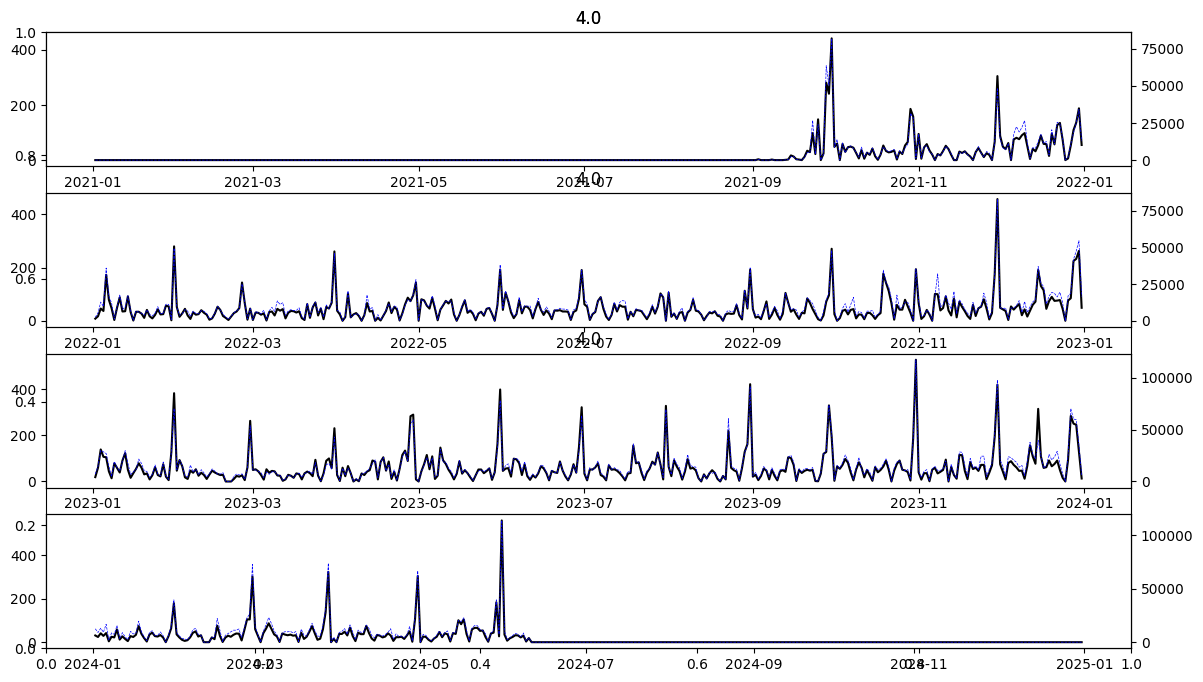

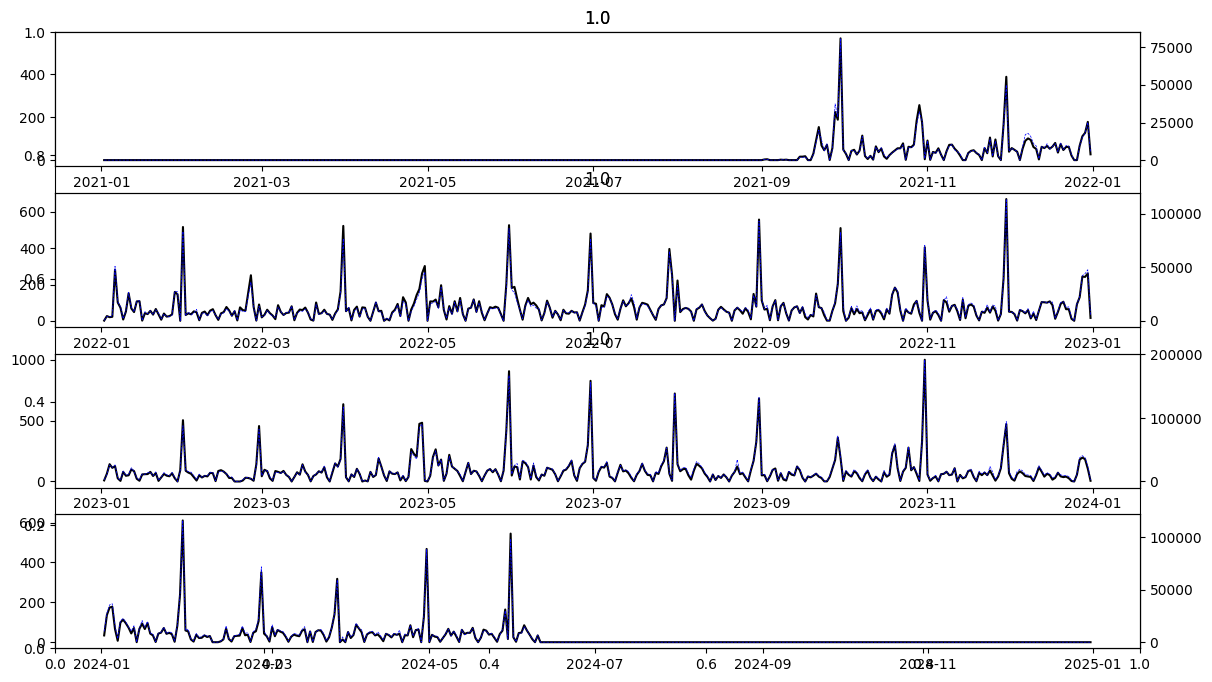

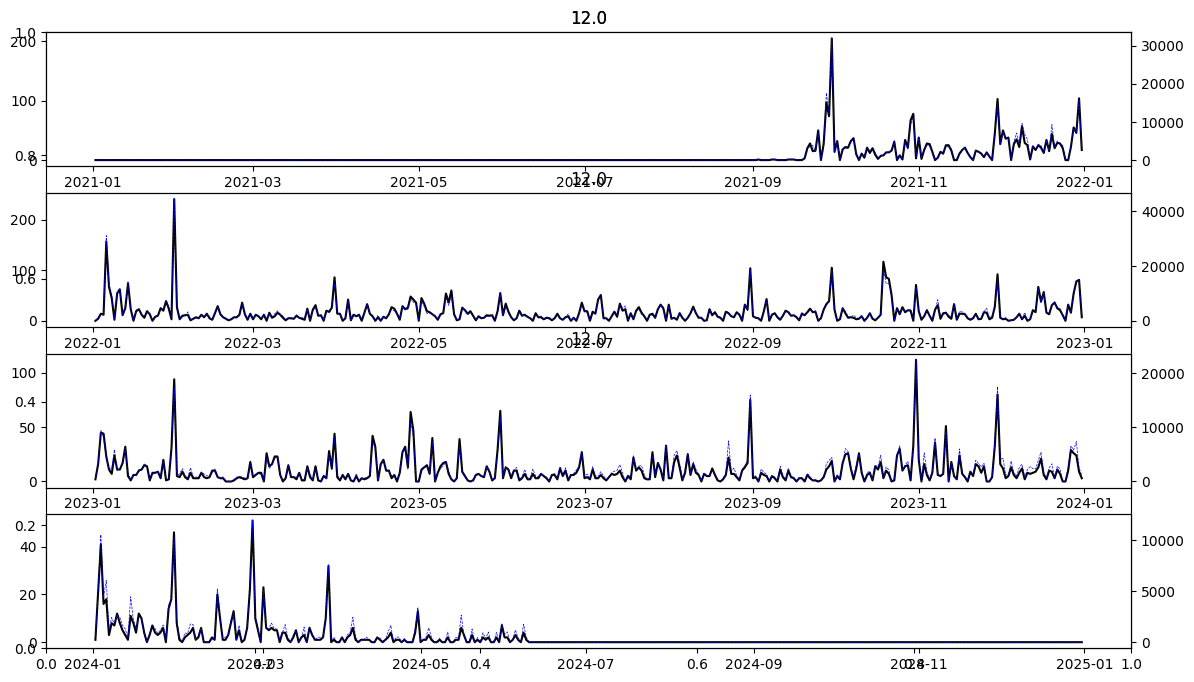

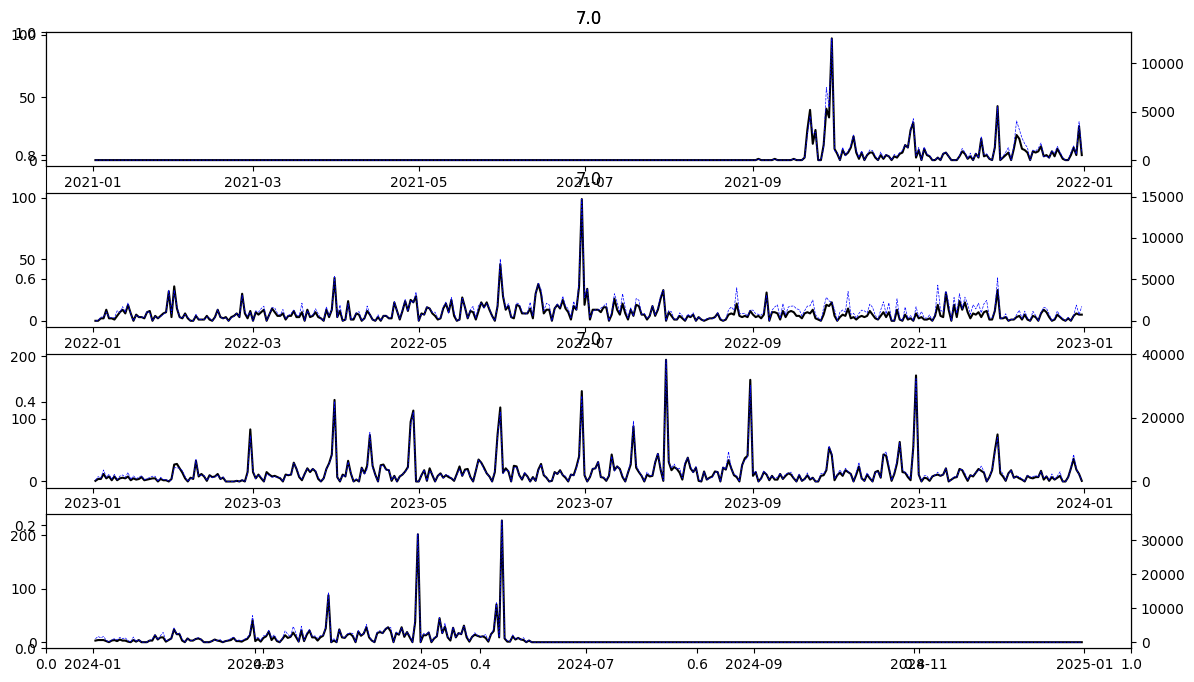

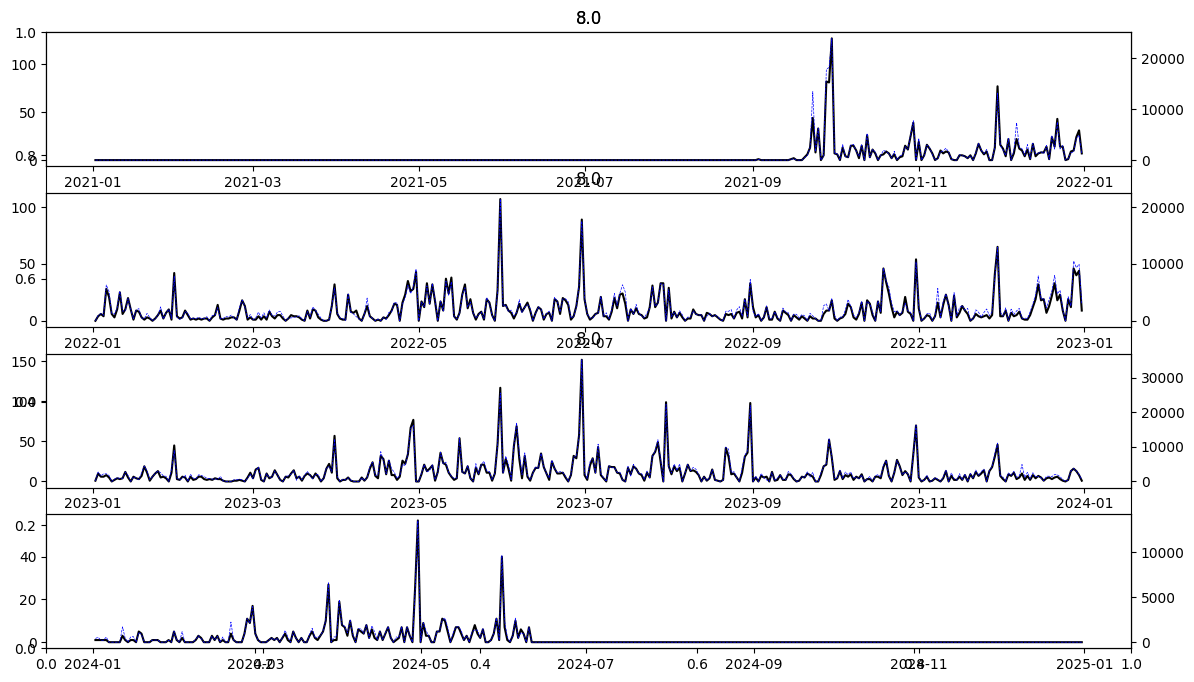

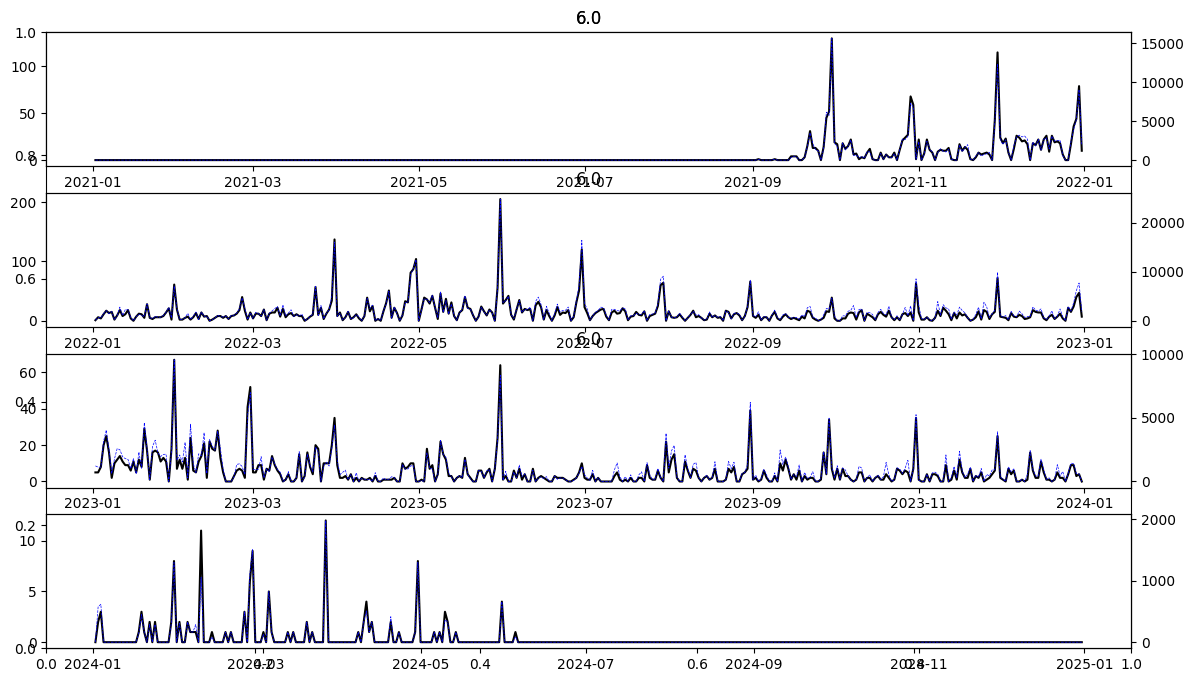

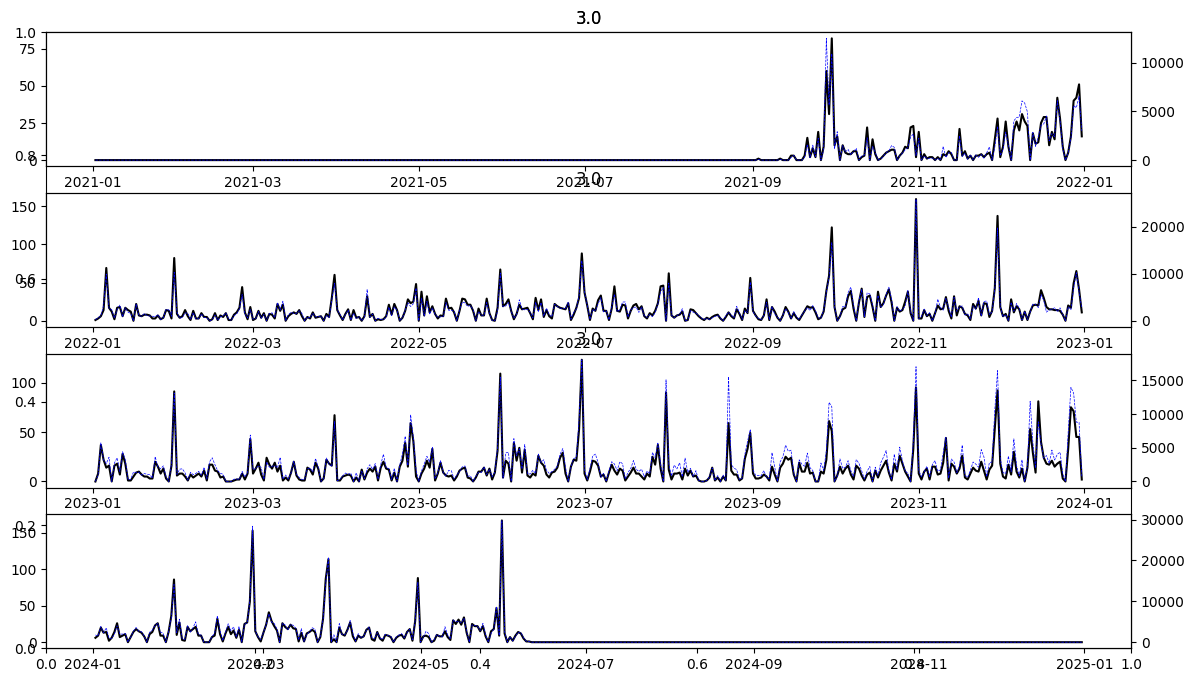

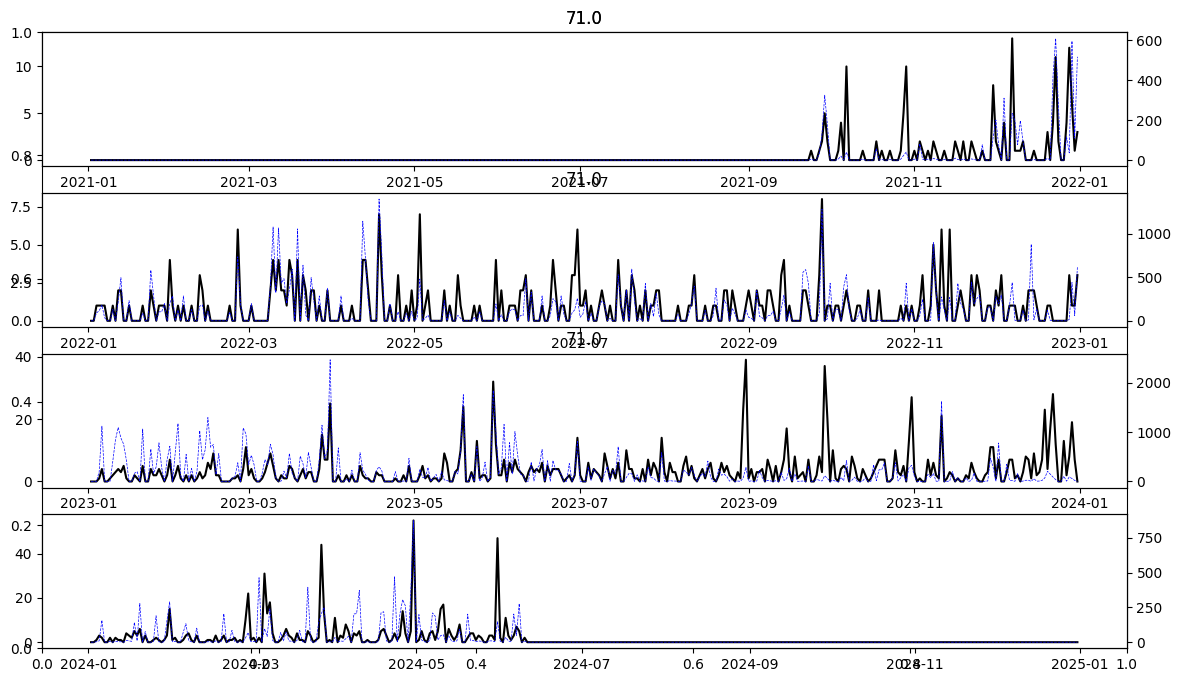

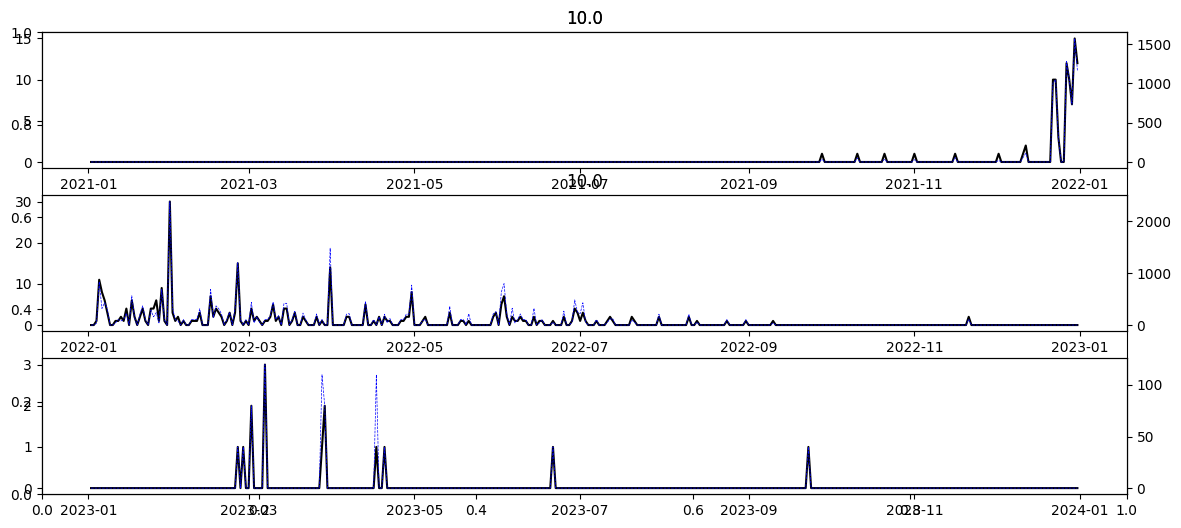

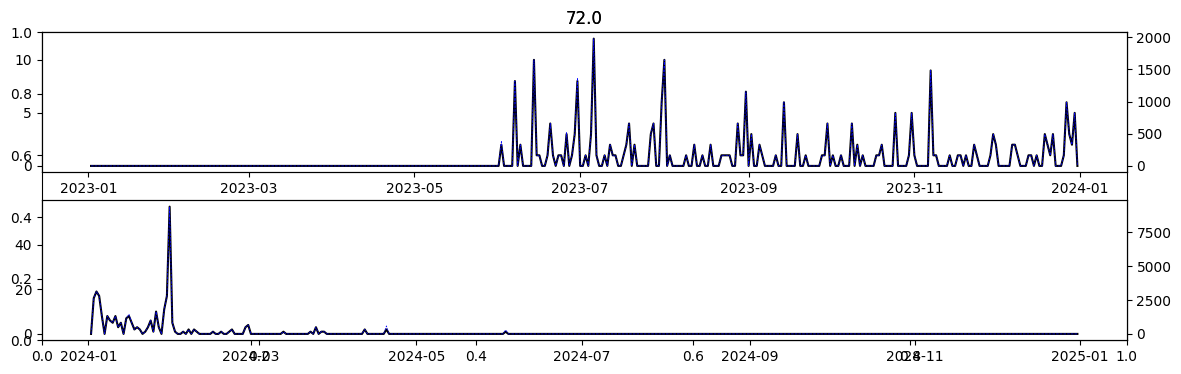

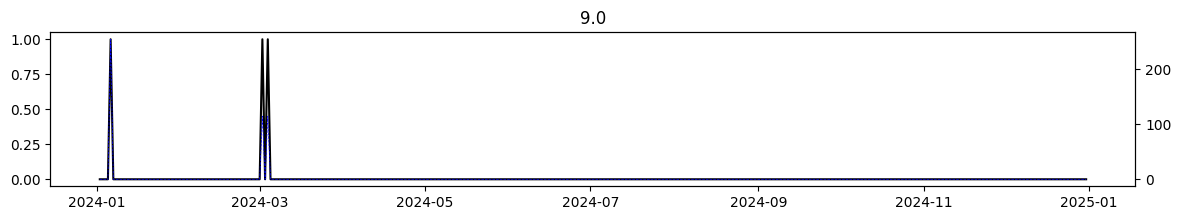

In [27]:

for grupo in df.grupo.unique():
    dft = df[df['grupo'] == grupo].groupby(['dtvenda']).agg({'qtd':'sum','vlvendido':'sum'})\
                        .reset_index()
    plot_serie(dft, grupo)

### Alguns grupos com histórico incompleto

No caso do grupo 9, possivelmente se trate de um produto promocional ou de um evento muito específico, por apresentar apenas 3 picos de venda

## 2.7 - Mapas Geográficos

Sem dados suficientes para análise geográfica

## 2.8 - Escolha dos dados

Para este estudo, trabalharemos com o grupo 5 e loja 3

In [48]:
df_analise = df[(df['loja']== 3)& (df['grupo']==5)]
df_analise.shape

(30626, 30)

In [49]:
df_analise.to_parquet('data/vendas.parquet')